In [ ]:
import nltk
import pandas as pd
import numpy as np

nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

Read the dataset into dataframe

In [ ]:
df=pd.read_excel(r'/content/drive/MyDrive/IR_project/fake job posting.xlsx')

In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI â€“ Environmental Systems Re...,"EDUCATION:Â Bachelorâ€™s or Masterâ€™s in GIS,...",Our culture is anything but corporateâ€”we hav...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17871 non-null  object
 7   requirements         15147 non-null  object
 8   benefits             10639 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
df[df.duplicated()]
# No duplicated Data

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent


<Axes: >

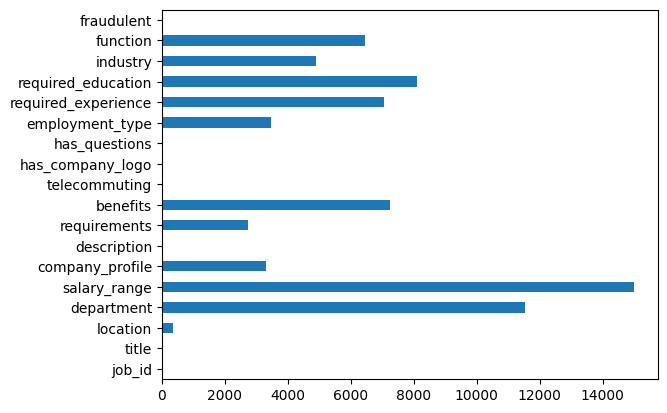

In [ ]:
df.isna().sum().plot(kind='barh')

In [ ]:
df.value_counts("fraudulent")

fraudulent
0    17014
1      866
dtype: int64

## Removing columns and Preprocessing Dataframe ands saving

In [ ]:
del_columns=['job_id','telecommuting','has_company_logo','has_questions','salary_range']

for i in del_columns:
  del df[i]

df=df.fillna('')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17880 non-null  object
 2   department           17880 non-null  object
 3   company_profile      17880 non-null  object
 4   description          17880 non-null  object
 5   requirements         17880 non-null  object
 6   benefits             17880 non-null  object
 7   employment_type      17880 non-null  object
 8   required_experience  17880 non-null  object
 9   required_education   17880 non-null  object
 10  industry             17880 non-null  object
 11  function             17880 non-null  object
 12  fraudulent           17880 non-null  int64 
dtypes: int64(1), object(12)
memory usage: 1.8+ MB


In [ ]:
columns=['title','location','department','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function']

for i in columns:
  df[i]=df[i].astype('str')

df['text'] = df['title']+' '+df['department']+' '+df['company_profile']+' '+df['description']+' '+df['requirements']+' '+df['benefits']+' '+df['employment_type']+' '+df['required_experience']+' '+df['required_education']+' '+df['industry']+' '+df['function']

In [ ]:
print(df['text'].head())

0    Marketing Intern Marketing We're Food52, and w...
1    Customer Service - Cloud Video Production Succ...
2    Commissioning Machinery Assistant (CMA)  Valor...
3    Account Executive - Washington DC Sales Our pa...
4    Bill Review Manager  SpotSource Solutions LLC ...
Name: text, dtype: object


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re

In [ ]:
from bs4 import BeautifulSoup
import spacy
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

#function to lemmatize the text
load_model = spacy.load('en_core_web_sm',disable = ['parser','ner'])
def lemmatize(text):
    doc = load_model(text)
    tex= " ".join([token.lemma_ for token in doc])
    return tex


#function to clean the whole text
def clean_text(text):
    #Converting to lowercase
    text = text.lower()
    #Removing emails
    text = re.sub(r'([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', '', text)
    #Removing URLs
    text = re.sub(r'(http|ftp|https)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', text)
    #Removing HTML tags
    text = BeautifulSoup(text, 'lxml').get_text()
    #Removing punctuations and numbers
    text = re.sub('[^A-Z a-z ]+', ' ', text)
    #Removing Multiple spaces
    text =  " ".join(text.split())
    #Removing Stop words
    text =  " ".join([t for t in text.split() if t not in stop_words])
    #lemmatizing the text
    text = lemmatize(text)
    return text

In [ ]:
df['pre_processed'] = df['text'].apply(clean_text)

<ipython-input-52-52bd71cba2c7>:25: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'lxml').get_text()


In [ ]:
df['pre_processed'].head()

0    market intern marketing food create groundbrea...
1    customer service cloud video production succes...
2    commission machinery assistant cma valor servi...
3    account executive washington dc sale passion i...
4    bill review manager spotsource solution llc gl...
Name: pre_processed, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
xtr,xt,ytr,yt=train_test_split(df['pre_processed'],df['fraudulent'],test_size=0.2,random_state=42)

In [ ]:
# saving training and testing to data frames
train_data=pd.DataFrame()
train_data['preprocessed_data']=xtr
train_data['label']=ytr
test_data=pd.DataFrame()
test_data['preprocessed_data']=xt
test_data['label']=yt


In [ ]:
train_data.to_csv(r'/content/drive/MyDrive/IR_project/train.csv',index=False)
test_data.to_csv(r'/content/drive/MyDrive/IR_project/test.csv',index=False)

## Implementing Simple machine Learning models

1.   KNN
2.   Naive Bayes
3.   Decision Tree
4.   Support Vector Machine
5.   Random Forest classifier




## Tf Idf Vectoriser

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()

train_df=pd.read_csv(r'/content/drive/MyDrive/IR_project/train.csv')
test_df=pd.read_csv(r'/content/drive/MyDrive/IR_project/test.csv')

vectoriser = TfidfVectorizer(max_features = 100)
xtr_df = vectoriser.fit_transform(train_df['preprocessed_data'])
xt_df = vectoriser.fit_transform(test_df['preprocessed_data'])

xtr=pd.DataFrame(xtr_df.toarray(),columns=vectoriser.get_feature_names_out())
xt=pd.DataFrame(xt_df.toarray(),columns=vectoriser.get_feature_names_out())
ytr=train_df['label']
yt=test_df['label']

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14304 entries, 0 to 14303
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   preprocessed_data  14304 non-null  object
 1   label              14304 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 223.6+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   preprocessed_data  3576 non-null   object
 1   label              3576 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 56.0+ KB


scaling the Dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
scaler = StandardScaler()
scaler.fit(xtr)

xtr = scaler.transform(xtr)
xt = scaler.transform(xt)

KNN with n_neighbors=1

In [ ]:
# Create a KNN classifier
knn_classifier = KNeighborsClassifier()

# Define the hyperparameter grid
param_grid = {
    'n_neighbors': np.arange(1, 21),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

# Perform random search cross-validation
random_search = RandomizedSearchCV(knn_classifier, param_distributions=param_grid, n_iter=10, cv=10)
random_search.fit(xtr, ytr)

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Best Parameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 7}
Best Score: 0.9776283883831054


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import joblib

knn=KNeighborsClassifier(weights='distance', p= 1, n_neighbors= 7)
knn.fit(xtr, ytr)

# Make predictions
y_pred = knn.predict(xt)

# Evaluate the model
print(confusion_matrix(yt, y_pred))
print(classification_report(yt, y_pred))
print(accuracy_score(yt,y_pred))
# joblib.dump(knn,r'/content/drive/MyDrive/IR_project/models/knn_model.joblib')


[[3362   33]
 [ 101   80]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3395
           1       0.71      0.44      0.54       181

    accuracy                           0.96      3576
   macro avg       0.84      0.72      0.76      3576
weighted avg       0.96      0.96      0.96      3576

0.9625279642058165


Random Forest Classifier

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf_classifier = RandomForestClassifier()
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Perform random search cross-validation
random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_grid, n_iter=10, cv=10)
random_search.fit(xtr, ytr)

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}
Best Score: 0.9698687894914311


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100,min_samples_leaf=1,min_samples_split=5,max_features='auto',max_depth=None)
rfc.fit(xtr,ytr)
y_pred=rfc.predict(xt)
# Evaluate the model
print(confusion_matrix(yt, y_pred))
print(classification_report(yt, y_pred))
print(accuracy_score(yt,y_pred))
# joblib.dump(rfc,r'/content/drive/MyDrive/IR_project/models/random_forest_model.joblib')


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[[3395    0]
 [ 164   17]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3395
           1       1.00      0.09      0.17       181

    accuracy                           0.95      3576
   macro avg       0.98      0.55      0.57      3576
weighted avg       0.96      0.95      0.94      3576

0.9541387024608501


['/content/drive/MyDrive/IR_project/models/random_forest_model.joblib']

Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(xtr, ytr)

# Make predictions
y_pred = naive_bayes.predict(xt)

# Evaluate the model
print(confusion_matrix(yt, y_pred))
print(classification_report(yt, y_pred))
print(accuracy_score(yt,y_pred))
# joblib.dump(naive_bayes,r'/content/drive/MyDrive/IR_project/models/naive_bayes_model.joblib')

[[2555  840]
 [  68  113]]
              precision    recall  f1-score   support

           0       0.97      0.75      0.85      3395
           1       0.12      0.62      0.20       181

    accuracy                           0.75      3576
   macro avg       0.55      0.69      0.52      3576
weighted avg       0.93      0.75      0.82      3576

0.7460850111856824


Decision Tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Perform random search cross-validation
random_search = RandomizedSearchCV(dt_classifier, param_distributions=param_grid, n_iter=10, cv=10)
random_search.fit(xtr, ytr)

# Print the best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}
Best Score: 0.9609202816749987


In [ ]:
from sklearn.tree import DecisionTreeClassifier
#  Create Decision Tree classifier
dt_classifier = DecisionTreeClassifier(min_samples_split=2, min_samples_leaf=1, max_features='sqrt', max_depth=10, criterion='gini')
dt_classifier.fit(xtr, ytr)

# Make predictions
y_pred = dt_classifier.predict(xt)

# Evaluate the model
print(confusion_matrix(yt, y_pred))
print(classification_report(yt, y_pred))
print(accuracy_score(yt,y_pred))
# joblib.dump(dt_classifier,r'/content/drive/MyDrive/IR_project/models/decision_tree_model.joblib')

[[3342   53]
 [ 152   29]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3395
           1       0.35      0.16      0.22       181

    accuracy                           0.94      3576
   macro avg       0.66      0.57      0.60      3576
weighted avg       0.93      0.94      0.93      3576

0.9426733780760627


['/content/drive/MyDrive/IR_project/models/decision_tree_model.joblib']

Support Vector machine Model

In [ ]:
from sklearn.svm import SVC

# Create SVM classifier
svc_classifier = SVC()
svc_classifier.fit(xtr, ytr)

# Make predictions
y_pred = svc_classifier.predict(xt)

# Evaluate the model
print(confusion_matrix(yt, y_pred))
print(classification_report(yt, y_pred))
print(accuracy_score(yt,y_pred))
# joblib.dump(dt_classifier,r'/content/drive/MyDrive/IR_project/models/svc_model.joblib')

[[3395    0]
 [ 158   23]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3395
           1       1.00      0.13      0.23       181

    accuracy                           0.96      3576
   macro avg       0.98      0.56      0.60      3576
weighted avg       0.96      0.96      0.94      3576

0.9558165548098434


MLP classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
# Create MLP classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)
mlp_classifier.fit(xtr, ytr)

# Make predictions
y_pred = mlp_classifier.predict(xt)

# Evaluate the model
print(confusion_matrix(yt, y_pred))
print(classification_report(yt, y_pred))
print(accuracy_score(yt,y_pred))
# joblib.dump(dt_classifier,r'/content/drive/MyDrive/IR_project/models/mlp_model.joblib')

[[3162  233]
 [ 152   29]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      3395
           1       0.11      0.16      0.13       181

    accuracy                           0.89      3576
   macro avg       0.53      0.55      0.54      3576
weighted avg       0.91      0.89      0.90      3576

0.892337807606264


Neural Network Classifier

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint_filepath = '/content/drive/MyDrive/IR_project/models/neural_network_model.h5'
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

In [ ]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dense, Dropout
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(ytr),y=ytr)
class_weights = dict(enumerate(class_weights))


# Create Neural Network model
model = Sequential()
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(xtr, ytr, epochs=50,validation_split=0.2 ,batch_size=64,callbacks=[checkpoint_callback],class_weight=class_weights)

Epoch 1/50
174/179 [============================>.] - ETA: 0s - loss: 0.6048 - accuracy: 0.6220
Epoch 1: val_loss improved from inf to 0.60686, saving model to /content/drive/MyDrive/IR_project/models/neural_network_model.h5
179/179 [==============================] - 2s 4ms/step - loss: 0.6042 - accuracy: 0.6254 - val_loss: 0.6069 - val_accuracy: 0.7574
Epoch 2/50
155/179 [========================>.....] - ETA: 0s - loss: 0.4641 - accuracy: 0.8058
Epoch 2: val_loss improved from 0.60686 to 0.40171, saving model to /content/drive/MyDrive/IR_project/models/neural_network_model.h5
179/179 [==============================] - 0s 3ms/step - loss: 0.4529 - accuracy: 0.8130 - val_loss: 0.4017 - val_accuracy: 0.8542
Epoch 3/50
177/179 [============================>.] - ETA: 0s - loss: 0.3519 - accuracy: 0.8677
Epoch 3: val_loss improved from 0.40171 to 0.35510, saving model to /content/drive/MyDrive/IR_project/models/neural_network_model.h5
179/179 [==============================] - 1s 3ms/step 

In [ ]:
from tensorflow.keras.models import load_model
loaded_model = load_model('/content/drive/MyDrive/IR_project/models/neural_network_model.h5')
pred = loaded_model.predict(xt)
loss, acc = loaded_model.evaluate(xt,yt, batch_size=32)

print('Test loss:', loss)
print('Test accuracy:', acc,end = '\n\n')

for i,x in enumerate(pred):
  if x >= 0.5:
    pred[i] = 1
  else:
    pred[i] = 0
cm = confusion_matrix(yt,pred)
print(cm)
cr = classification_report(yt,pred)
print(cr)

112/112 [==============================] - 0s 2ms/step - loss: 0.3083 - accuracy: 0.9130
Test loss: 0.3083372116088867
Test accuracy: 0.9130313396453857

[[3187  208]
 [ 103   78]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      3395
           1       0.27      0.43      0.33       181

    accuracy                           0.91      3576
   macro avg       0.62      0.68      0.64      3576
weighted avg       0.93      0.91      0.92      3576



## CNN model with word level embedding

In [ ]:
# from sklearn.model_selection import train_test_split

# xtr,xt,ytr,yt=train_test_split(df['text'],df['fraudulent'],test_size=0.2,random_state=42)

In [ ]:
# import pandas as pd
# import pickle
# import numpy as np
# from sklearn.preprocessing import LabelEncoder as le
# import tensorflow as tf
# from sklearn.metrics import confusion_matrix,classification_report
# from tensorflow.keras.models import load_model
# from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras import layers
# from gensim.models import KeyedVectors

In [ ]:
# max_length = 50
# embedding_dim = 50
# num_words = 2624

In [ ]:
# glove_file = '/content/drive/MyDrive/FYP-DATA-AND-RESOURCES/Models_and_data/glove.6B.50d.txt'
# word_vectors = KeyedVectors.load_word2vec_format(glove_file, binary=False)

# # df['processed_text'] = preprocess_text(df)

# tokenizer = tf.keras.preprocessing.text.Tokenizer()
# tokenizer.fit_on_texts(xtr)
# sequences = tokenizer.texts_to_sequences(xtr)
# padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(
#     sequences, maxlen=max_length, padding='post', truncating='post'
# )

# with open('/content/drive/MyDrive/IR_project/models/word_level_tokenizer.pickle', 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# word_index = tokenizer.word_index
# num_words = len(word_index) + 1
# # print(num_words)
# embedding_matrix = np.zeros((num_words, embedding_dim))
# for word, i in word_index.items():
#     if word in word_vectors:
#         embedding_matrix[i] = word_vectors[word]

In [ ]:
# sentence_lengths = xtr.apply(lambda x: [len(x) for x in xtr])
# avg_sentence_length = sentence_lengths.apply(lambda x: sum(x) / len(x))
# print("Average sentence length:", avg_sentence_length.mean())

Average sentence length: 1995.5264261744962


In [ ]:
# checkpoint_filepath = '/content/drive/MyDrive/IR_project/models/cnn_wordlevel.h5'
# checkpoint_callback = ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     monitor='val_accuracy',
#     mode='max',
#     save_best_only=True,
#     verbose=1
# )

In [ ]:
# model = tf.keras.models.Sequential([
#     layers.Embedding(num_words, embedding_dim, embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
#                     input_length=max_length, trainable=False),
#     tf.keras.layers.Conv1D(128, 5, activation='relu'),
#     tf.keras.layers.MaxPooling1D(pool_size=4),
#     tf.keras.layers.Conv1D(256, 5, activation='relu'),
#     tf.keras.layers.MaxPooling1D(pool_size=4),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.Dense(1, activation='sigmoid')
# ])
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(padded_sequences, ytr, epochs = 100, validation_split = 0.1,callbacks=[checkpoint_callback])

Epoch 1/100
403/403 [==============================] - ETA: 0s - loss: 0.8501 - accuracy: 0.9501
Epoch 1: val_accuracy improved from -inf to 0.94969, saving model to /content/drive/MyDrive/IR_project/models/cnn_wordlevel.h5
403/403 [==============================] - 21s 18ms/step - loss: 0.8501 - accuracy: 0.9501 - val_loss: 0.1357 - val_accuracy: 0.9497
Epoch 2/100
395/403 [============================>.] - ETA: 0s - loss: 0.1009 - accuracy: 0.9706
Epoch 2: val_accuracy improved from 0.94969 to 0.97624, saving model to /content/drive/MyDrive/IR_project/models/cnn_wordlevel.h5
403/403 [==============================] - 7s 16ms/step - loss: 0.1004 - accuracy: 0.9708 - val_loss: 0.0987 - val_accuracy: 0.9762
Epoch 3/100
399/403 [============================>.] - ETA: 0s - loss: 0.0665 - accuracy: 0.9866
Epoch 3: val_accuracy improved from 0.97624 to 0.98253, saving model to /content/drive/MyDrive/IR_project/models/cnn_wordlevel.h5
403/403 [==============================] - 5s 12ms/step -

In [ ]:
# with open('/content/drive/MyDrive/IR_project/models/word_level_tokenizer.pickle', 'rb') as handle:
#     loaded_tokenizer = pickle.load(handle)

# loaded_model = load_model('/content/drive/MyDrive/IR_project/models/cnn_wordlevel.h5')

In [ ]:
# test_sequences = loaded_tokenizer.texts_to_sequences(xt)
# test_data_padded = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_length, padding='post', truncating='post')

# pred = loaded_model.predict(test_data_padded)
# loss, acc = loaded_model.evaluate(test_data_padded,yt, batch_size=32)

# print('Test loss:', loss)
# print('Test accuracy:', acc,end = '\n\n')

# for i,x in enumerate(pred):
#   if x >= 0.5:
#     pred[i] = 1
#   else:
#     pred[i] = 0
# cm = confusion_matrix(yt,pred)
# print(cm)
# cr = classification_report(yt,pred)
# print(cr)

112/112 [==============================] - 1s 3ms/step - loss: 0.2317 - accuracy: 0.9779
Test loss: 0.23174859583377838
Test accuracy: 0.9779082536697388

[[3376   19]
 [  60  121]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3395
           1       0.86      0.67      0.75       181

    accuracy                           0.98      3576
   macro avg       0.92      0.83      0.87      3576
weighted avg       0.98      0.98      0.98      3576



## Model using Attention with transformer

In [ ]:
import pandas as pd
import pickle
import numpy as np
from sklearn.preprocessing import LabelEncoder as le
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers
from gensim.models import KeyedVectors

In [ ]:
# loading the training data
train_df=pd.read_csv(r'/content/drive/MyDrive/IR_project/train.csv')

In [ ]:
print(train_df.head())

                                   preprocessed_data  label
0  operation specialist operation want build st c...      0
1  purolator international pricing financial anal...      0
2  account manager maker row online marketplace c...      0
3  immediate opening j ee developer bahrain infor...      0
4  senior strategic buyer supply chain ms office ...      0


In [ ]:
xtr=train_df['preprocessed_data'].values
ytr=train_df['label'].values

In [ ]:
# from sklearn.utils import class_weight

# class_weights = class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(ytr),y=ytr)

# class_weights = dict(enumerate(class_weights))

In [ ]:
class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, embed_dim, num_heads=8):
        super(MultiHeadSelfAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        if embed_dim % num_heads != 0:
            raise ValueError(
                f"embedding dimension = {embed_dim} should be divisible by number of heads = {num_heads}"
            )
        self.projection_dim = embed_dim // num_heads
        self.query_dense = layers.Dense(embed_dim)
        self.key_dense = layers.Dense(embed_dim)
        self.value_dense = layers.Dense(embed_dim)
        self.combine_heads = layers.Dense(embed_dim)

    def attention(self, query, key, value):
        score = tf.matmul(query, key, transpose_b=True)
        dim_key = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_score = score / tf.math.sqrt(dim_key)
        weights = tf.nn.softmax(scaled_score, axis=-1)
        output = tf.matmul(weights, value)
        return output, weights

    def separate_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.projection_dim))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)
        query = self.separate_heads(query, batch_size)
        key = self.separate_heads(key, batch_size)
        value = self.separate_heads(value, batch_size)

        attention, weights = self.attention(query, key, value)
        attention = tf.transpose(attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(attention, (batch_size, -1, self.embed_dim))
        output = self.combine_heads(concat_attention)
        return output


In [ ]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = MultiHeadSelfAttention(embed_dim, num_heads)
        self.ffn = tf.keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)


In [ ]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

def build_model(max_len, vocab_size, embed_dim, num_heads, ff_dim):
    inputs = layers.Input(shape=(max_len,))
    embedding_layer = TokenAndPositionEmbedding(max_len, vocab_size, embed_dim)
    x = embedding_layer(inputs)
    transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
    x = transformer_block(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(0.1)(x)
    x = layers.Dense(20, activation="relu")(x)
    x = layers.Dropout(0.1)(x)
    outputs = layers.Dense(2, activation="softmax")(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    return model

In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/IR_project/models/attention.h5'
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

In [ ]:
# parameters
max_len = 512  # maximum length of a sequence
vocab_size = 20000  # size of your vocabulary
embed_dim = 128  # embedding dimension
num_heads = 8  # number of attention heads
ff_dim = 32  # hidden layer size in feed forward network inside transformer

model = build_model(max_len, vocab_size, embed_dim, num_heads, ff_dim)

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512)]             0         
                                                                 
 token_and_position_embeddin  (None, 512, 128)         2625536   
 g_2 (TokenAndPositionEmbedd                                     
 ing)                                                            
                                                                 
 transformer_block_2 (Transf  (None, 512, 128)         74912     
 ormerBlock)                                                     
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_8 (Dropout)         (None, 128)               0   

In [ ]:
# from keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # maximum number of words to keep, based on word frequency
# max_words = 20000
# xtr = xtr.astype(np.str)
# tokenizer = Tokenizer(num_words=max_words)
# tokenizer.fit_on_texts(list(xtr))

# xtr = tokenizer.texts_to_sequences(xtr)
# # max length for a doc (you can also set this to an arbitrary number)
# max_len = 512
# xtr = pad_sequences(xtr, maxlen=max_len)

<ipython-input-106-e76e92ca6d6f>:6: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xtr = xtr.astype(np.str)


In [ ]:
# # train model
# history = model.fit(xtr, ytr,
#                     batch_size=32,
#                     epochs=10,
#                     validation_split=0.2,
#                     # class_weight=class_weights,
#                     callbacks=[checkpoint_callback])

Epoch 1/10
358/358 [==============================] - ETA: 0s - loss: 0.1503 - accuracy: 0.9570
Epoch 1: val_loss improved from inf to 0.07451, saving model to /content/drive/MyDrive/IR_project/models/attention.h5
358/358 [==============================] - 59s 151ms/step - loss: 0.1503 - accuracy: 0.9570 - val_loss: 0.0745 - val_accuracy: 0.9780
Epoch 2/10
358/358 [==============================] - ETA: 0s - loss: 0.0413 - accuracy: 0.9858
Epoch 2: val_loss improved from 0.07451 to 0.06253, saving model to /content/drive/MyDrive/IR_project/models/attention.h5
358/358 [==============================] - 35s 96ms/step - loss: 0.0413 - accuracy: 0.9858 - val_loss: 0.0625 - val_accuracy: 0.9846
Epoch 3/10
358/358 [==============================] - ETA: 0s - loss: 0.0150 - accuracy: 0.9955
Epoch 3: val_loss did not improve from 0.06253
358/358 [==============================] - 28s 77ms/step - loss: 0.0150 - accuracy: 0.9955 - val_loss: 0.0729 - val_accuracy: 0.9829
Epoch 4/10
358/358 [=====

In [ ]:
# # save the tokeniser for the preprocessed data to use in the model.
# with open('/content/drive/MyDrive/IR_project/models/attention_tokenizer.pickle', 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# with open('/content/drive/MyDrive/IR_project/models/attention_tokenizer.pickle', 'rb') as handle:
#     loaded_tokenizer = pickle.load(handle)

# loaded_model = load_model('/content/drive/MyDrive/IR_project/models/attention.h5',custom_objects={'TokenAndPositionEmbedding': TokenAndPositionEmbedding,
#                                           'TransformerBlock': TransformerBlock,
#                                           'MultiHeadSelfAttention': MultiHeadSelfAttention})

In [ ]:
# test_data=pd.read_csv(r'/content/drive/MyDrive/IR_project/test.csv')
# xt=test_data['preprocessed_data'].values
# yt=test_data['label'].values

In [ ]:
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Convert text to sequences
# xt = xt.astype(np.str)
# x_test_sequences = loaded_tokenizer.texts_to_sequences(xt)

# # Pad sequences
# x_test = pad_sequences(x_test_sequences, maxlen=max_len)

# predictions = loaded_model.predict(x_test)
# loss, acc = loaded_model.evaluate(x_test, yt,batch_size=32)

# # For softmax activation
# predicted_labels = np.argmax(predictions, axis=1)

# if len(yt.shape) > 1 and yt.shape[1] > 1:
#     yt = np.argmax(yt, axis=1)

# # Compute confusion matrix
# conf_mat = confusion_matrix(yt, predicted_labels)

# print('Confusion Matrix:')
# print(conf_mat)

# # Compute classification report
# class_report = classification_report(yt, predicted_labels)

# print('Classification Report:')
# print(class_report)


<ipython-input-111-d36cd0022894>:4: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xt = xt.astype(np.str)


112/112 [==============================] - 2s 18ms/step - loss: 0.0659 - accuracy: 0.9807
Confusion Matrix:
[[3369   26]
 [  43  138]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3395
           1       0.84      0.76      0.80       181

    accuracy                           0.98      3576
   macro avg       0.91      0.88      0.89      3576
weighted avg       0.98      0.98      0.98      3576



## Model using Bi-LSTM

In [ ]:
# from keras.preprocessing.text import Tokenizer
# from keras.utils import pad_sequences
# import numpy as np

# # Set parameters
# maxlen = 100  # Maximum length of a sequence - you'll need to choose this
# max_words = 10000  # Size of the vocabulary

# # Tokenize the text
# tokenizer = Tokenizer(num_words=max_words)
# tokenizer.fit_on_texts(xtr)
# xtr = tokenizer.texts_to_sequences(xtr)

# word_index = tokenizer.word_index
# print(f'Found {len(word_index)} unique tokens.')

# # Pad sequences
# xtr = pad_sequences(xtr, maxlen=maxlen)

# # Prepare labels
# ytr = np.asarray(ytr)
# print(f'Shape of data tensor: {xtr.shape}')
# print(f'Shape of label tensor: {ytr.shape}')


Found 79864 unique tokens.
Shape of data tensor: (14304, 100)
Shape of label tensor: (14304,)


In [ ]:
# import pickle
# # save the tokeniser for the preprocessed data to use in the model.
# with open('/content/drive/MyDrive/IR_project/models/bi_gru_lstm_tokenizer.pickle', 'wb') as handle:
#     pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# from tensorflow.keras.utils import pad_sequences
# from sklearn.metrics import confusion_matrix,classification_report
# from sklearn.metrics import accuracy_score
# # Convert text to sequences
# xt = xt.astype(np.str)
# x_test_sequences = loaded_tokenizer.texts_to_sequences(xt)

# # Pad sequences
# x_test = pad_sequences(x_test_sequences, maxlen=max_len)

# # Assume `x_test` and `y_test` are your test data and labels
# y_pred = loaded_model.predict(x_test)

# # Since the model outputs probabilities, convert them to class labels
# y_pred = np.round(y_pred).astype(int)

# print("Classification Report:\n", classification_report(yt, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(yt, y_pred))
# print("Accuracy Score:", accuracy_score(yt, y_pred))


<ipython-input-13-89c33207a120>:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  xt = xt.astype(np.str)


112/112 [==============================] - 1s 9ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.82      0.88      3395
           1       0.08      0.30      0.13       181

    accuracy                           0.79      3576
   macro avg       0.52      0.56      0.50      3576
weighted avg       0.91      0.79      0.84      3576

Confusion Matrix:
 [[2771  624]
 [ 127   54]]
Accuracy Score: 0.7899888143176734


In [ ]:
import pandas as pd
import pickle
import numpy as np
from sklearn.preprocessing import LabelEncoder as le
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers
from gensim.models import KeyedVectors

In [ ]:
import pandas as pd
import numpy as np

train_df=pd.read_csv(r'/content/drive/MyDrive/IR_project/train.csv')
test_df=pd.read_csv(r'/content/drive/MyDrive/IR_project/test.csv')

xtr=train_df['preprocessed_data']
ytr=train_df['label']
xt=test_df['preprocessed_data']
yt=test_df['label']

In [ ]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(ytr),y=ytr)
class_weights = dict(enumerate(class_weights))

In [ ]:
max_len = 50
embedding_dim = 50
max_words = 2624

In [ ]:
glove_file = '/content/drive/MyDrive/FYP-DATA-AND-RESOURCES/Models_and_data/glove.6B.50d.txt'
word_vectors = KeyedVectors.load_word2vec_format(glove_file, binary=False)

# df['processed_text'] = preprocess_text(df)

tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(xtr)
sequences = tokenizer.texts_to_sequences(xtr)
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(
    sequences, maxlen=max_len, padding='post', truncating='post'
)

with open('/content/drive/MyDrive/IR_project/models/word_level_tokenizer_bilstm.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

word_index = tokenizer.word_index
num_words = len(word_index) + 1
# print(num_words)
embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in word_index.items():
    if word in word_vectors:
        embedding_matrix[i] = word_vectors[word]

In [ ]:
sentence_lengths = xtr.apply(lambda x: [len(x) for x in xtr])
avg_sentence_length = sentence_lengths.apply(lambda x: sum(x) / len(x))
print("Average sentence length:", avg_sentence_length.mean())

Average sentence length: 1995.5264261744962


In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_filepath = '/content/drive/MyDrive/IR_project/models/bi_gru_lstm_model_6.h5'
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=1
)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Bidirectional, GRU, LSTM
from keras.initializers import Constant

model = Sequential()
model.add(Embedding(num_words,
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=max_len,
                    trainable=False))
model.add(Bidirectional(GRU(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 50)            3993250   
                                                                 
 bidirectional (Bidirectiona  (None, 50, 256)          138240    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0

In [ ]:
# Assume that `x_train` and `y_train` are your training data and labels
model.fit(padded_sequences, ytr, batch_size=64,epochs=20,validation_split=0.2,callbacks=[checkpoint_callback],
          class_weight=class_weights
          )

Epoch 1/20
178/179 [============================>.] - ETA: 0s - loss: 0.5871 - accuracy: 0.6652
Epoch 1: val_loss improved from inf to 0.51155, saving model to /content/drive/MyDrive/IR_project/models/bi_gru_lstm_model_6.h5
179/179 [==============================] - 27s 69ms/step - loss: 0.5860 - accuracy: 0.6651 - val_loss: 0.5115 - val_accuracy: 0.7277
Epoch 2/20
178/179 [============================>.] - ETA: 0s - loss: 0.4204 - accuracy: 0.8050
Epoch 2: val_loss improved from 0.51155 to 0.21496, saving model to /content/drive/MyDrive/IR_project/models/bi_gru_lstm_model_6.h5
179/179 [==============================] - 10s 57ms/step - loss: 0.4194 - accuracy: 0.8056 - val_loss: 0.2150 - val_accuracy: 0.9423
Epoch 3/20
178/179 [============================>.] - ETA: 0s - loss: 0.3223 - accuracy: 0.8705
Epoch 3: val_loss did not improve from 0.21496
179/179 [==============================] - 3s 14ms/step - loss: 0.3224 - accuracy: 0.8704 - val_loss: 0.2277 - val_accuracy: 0.9091
Epoch 4

In [ ]:
import pickle
with open('/content/drive/MyDrive/IR_project/models/word_level_tokenizer_bilstm.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)

loaded_model = load_model('/content/drive/MyDrive/IR_project/models/bi_gru_lstm_model_6.h5')

In [ ]:
test_sequences = loaded_tokenizer.texts_to_sequences(xt)
test_data_padded = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_len, padding='post', truncating='post')

pred = loaded_model.predict(test_data_padded)
loss, acc = loaded_model.evaluate(test_data_padded,yt, batch_size=32)

print('Test loss:', loss)
print('Test accuracy:', acc,end = '\n\n')
print(pred)
for i,x in enumerate(pred):
  if x >= 0.5:
    pred[i] = 1
  else:
    pred[i] = 0
cm = confusion_matrix(yt,pred)
print(cm)
cr = classification_report(yt,pred)
print(cr)

112/112 [==============================] - 1s 8ms/step - loss: 0.0954 - accuracy: 0.9751
Test loss: 0.09541492909193039
Test accuracy: 0.9751118421554565

[[2.2606754e-09]
 [8.6906884e-06]
 [3.0261403e-06]
 ...
 [3.0458486e-06]
 [1.8053912e-06]
 [1.0628543e-05]]
[[3340   55]
 [  34  147]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3395
           1       0.73      0.81      0.77       181

    accuracy                           0.98      3576
   macro avg       0.86      0.90      0.88      3576
weighted avg       0.98      0.98      0.98      3576

